<a href="https://colab.research.google.com/github/mcfardc/AERO-7970/blob/main/HW3_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW 3 Problem 3
This code determines the effect of hydrogen addition on the laminar flame speed of a stoichiometric mixture of methane and air.

In [1]:
!pip install Cantera
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 37.0 MB/s eta 0:00:00


# Example from class using hydrogen at lean conditions

In [ ]:
gas1 = ct.Solution('gri30.yaml')
gas1.TP = 300, ct.one_atm

phi = .7
FUEL = 'CH4:0, H2:1'
OXID = 'O2:1, N2:3.76'
gas1.set_equivalence_ratio(phi,FUEL,OXID)
gas1()
#help(gas1)


  gri30:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   0.92424 kg/m^3
  mean mol. weight   22.752 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy            2402.2             54655  J
   internal energy       -1.0723e+05       -2.4397e+06  J
           entropy            8255.9        1.8784e+05  J/K
    Gibbs function       -2.4744e+06       -5.6297e+07  J
 heat capacity c_p            1277.9             29075  J/K
 heat capacity c_v            912.47             20761  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2          0.020138           0.22727           -17.199
                O2           0.22831           0.16234           -26.492
                N2           0.75155           0.61039           -23.527

In [ ]:
# Domain size in meters
w = 0.01

# Create flame object
flame = ct.FreeFlame(gas1, width=w)

# Solver tolerance and logging level
flame.set_refine_criteria(ratio = 3, slope = 0.1, curve = 0.1)
loglevel = 1

# Display other parameters for flame object
#help(flame)

In [ ]:
# Attempt solution
flame.solve(loglevel = loglevel, auto=True)


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................

Attempt Newton solution of steady-state problem.
Newton steady-state solve failed.

Attempt 10 timesteps.
Final timestep info: dt= 6.328e-06  log(ss)= 7.097     

Attempt Newton solution of steady-state problem.
Newton steady-state solve failed.

Attempt 10 timesteps.
Final timestep info: dt= 0.0001622  log(ss)= 4.669     

Attempt Newton solution of steady-state problem.
Newton steady-state solve succeeded.

Problem solved on [9] point grid(s).
Expanding domain to accommodate flame thickness. New width: 0.02 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 
    to resolve H H2 H2O H2O2 HO2 N2 N2O NNH NO NO2 O O2 OH T velocity 
##############################################################################

***********

Flame speed is 123.21 cm/s


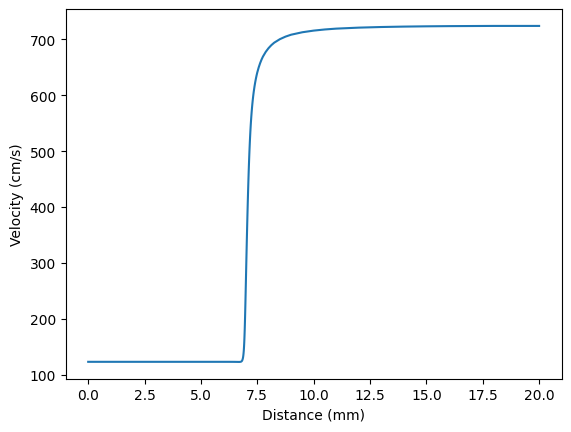

In [ ]:
# Produce flame velocity profile
Su0 = flame.velocity[0]
print('Flame speed is {:.2f} cm/s'.format(Su0*100))
  #flame speed = unburned gas velocity
  #temp profile gets flame thickness
  #minor species (H) gets reaction layer thickness

plt.plot(flame.grid*1e3, flame.velocity*1e2)
plt.ylabel('Velocity (cm/s)')
plt.xlabel('Distance (mm)')
plt.show()

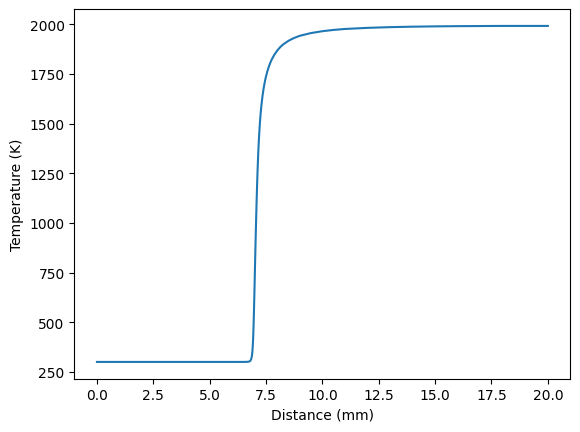

In [ ]:
# Plot temperature through the flame
plt.plot(flame.grid*1e3,flame.T)
plt.xlabel('Distance (mm)')
plt.ylabel('Temperature (K)')
#plt.xlim(6.5,9)
plt.show()

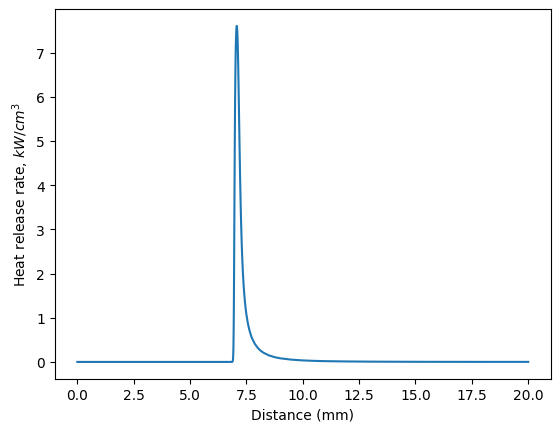

In [ ]:
# Plot heat release profile
plt.plot(flame.grid*1e3, flame.heat_release_rate/1e9)
plt.xlabel('Distance (mm)')
plt.ylabel('Heat release rate, $kW/cm^3$')
#plt.xlim(6.5,9)
plt.show()

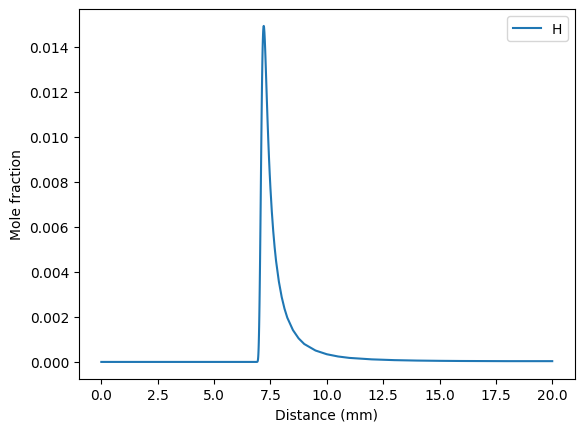

In [ ]:
# plot minor species, hydrogen atom
plt.plot(flame.grid*1e3,flame.X[gas1.species_index('H')]) # plot x-axis in mm
#plt.plot(flame.grid*1e3,flame.X[gas1.species_index('H2')]) # plot x-axis in mm
plt.legend(['H','H2'])
plt.xlabel('Distance (mm)')
plt.ylabel('Mole fraction')
#plt.xlim(6.5,9)
plt.show()


In [ ]:
# Calculating Flame Thickness
alpha = (flame.thermal_conductivity[-1])/(flame.cp[0]*flame.density[0])
thickness = alpha/Su0
print('Flame thickness is {:.4f} mm'.format(thickness*1000))

#dTdx = np.gradient(flame.T,flame.grid)
#max_dTdx = np.max(np.abs(dTdx))
#thickness1 = (flame.T[-1]-flame.T[0])/max_dTdx
#print('Reaction layer thickness is {:.4f} mm'.format(thickness1*1000))

Flame thickness is 0.1018 mm


In [ ]:
# calculating reaction layer thickness
dXdx = np.gradient(flame.X[gas1.species_index('H')],flame.grid)
H = flame.X[gas1.species_index('H')]
#print(H)
max_dXdx = np.max(np.abs(dXdx))
thickness2 = (H[-1]-H[0])/max_dXdx
print('Reaction layer thickness is {:.4f} mm'.format(thickness2*1000))

Reaction layer thickness is 0.0004 mm


# Range of H2 percentages
Range is from 0 - 50% in increments of 10%

Flame speed is 38.36 cm/s
Flame thickness is 0.3349 mm
Flame speed is 40.97 cm/s
Flame thickness is 0.3157 mm
Flame speed is 44.13 cm/s
Flame thickness is 0.2951 mm
Flame speed is 48.17 cm/s
Flame thickness is 0.2727 mm
Flame speed is 53.53 cm/s
Flame thickness is 0.2480 mm
Flame speed is 60.83 cm/s
Flame thickness is 0.2211 mm


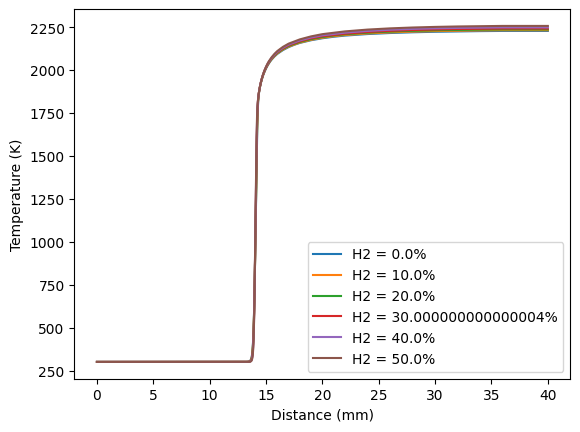

In [3]:

perc_vec = np.arange(0,.6,.1) # percentage vector
SL_vec = np.zeros(len(perc_vec)) # flame speed vector
thickness_vec = np.zeros(len(perc_vec))

for i in range(len(perc_vec)):
  gas = ct.Solution('gri30.yaml')
  gas.TP = 300, ct.one_atm
  phi = 1
  perc = perc_vec[i]
  FUEL = f'CH4:{1*(1-perc)}, H2:{perc}'
  OXID = 'O2:1, N2:3.76'
  gas.set_equivalence_ratio(phi,FUEL,OXID)
  # Domain size in meters
  w = 0.01
  # Create flame object
  flame = ct.FreeFlame(gas, width=w)
  # Solver tolerance and logging level
  flame.set_refine_criteria(ratio = 3, slope = 0.1, curve = 0.1)
  loglevel = 0
  # Solve
  flame.solve(loglevel = loglevel, auto=True)
  Su0 = flame.velocity[0]
  SL_vec[i] = Su0
  print('Flame speed is {:.2f} cm/s'.format(Su0*100))
  # Calculate flame thickness
  alpha = flame.thermal_conductivity[-1]/(flame.cp[0]*flame.density[0])
  thickness = alpha/Su0
  thickness_vec[i] = thickness
  print('Flame thickness is {:.4f} mm'.format(thickness*1000))
  plt.figure(1)
  plt.plot(flame.grid*1e3, flame.T, label=f'H2 = {perc*100}%')

plt.figure(1)
plt.legend()
plt.xlabel('Distance (mm)')
plt.ylabel('Temperature (K)')
plt.show()


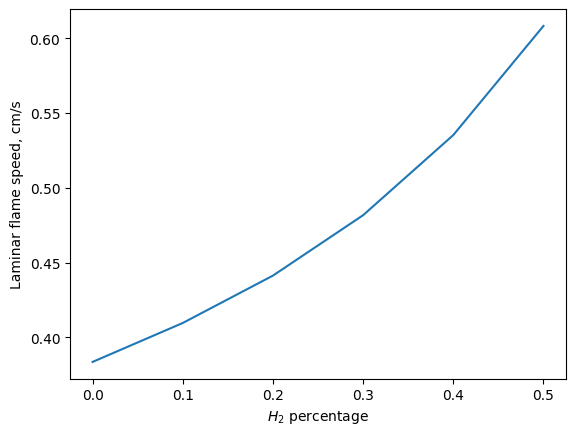

In [ ]:
plt.plot(perc_vec, SL_vec)
plt.xlabel('$H_2$ percentage')
plt.ylabel('Laminar flame speed, cm/s')
plt.show()

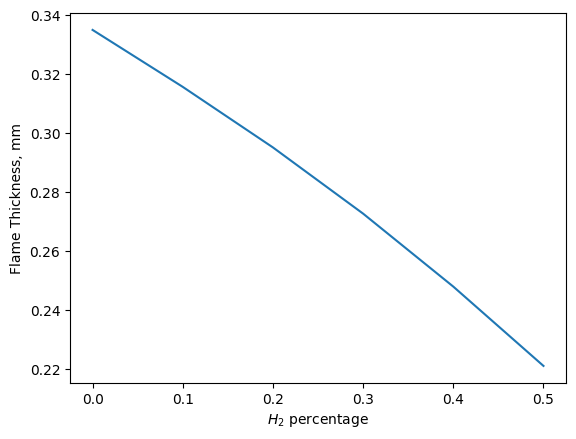

In [ ]:
plt.plot(perc_vec, thickness_vec*1000)
plt.xlabel('$H_2$ percentage')
plt.ylabel('Flame Thickness, mm')
plt.show()